# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [133]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA_YB/Datasets/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

In [136]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,False,True


In [137]:
X = pd.DataFrame(X)
X.columns = data.columns
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1.0,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1.0,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.0,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.0,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,0.0,1.0


In [138]:
y = pd.DataFrame(y)
y.columns = ['Rings']
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [139]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [140]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [141]:
print(X_train.shape, y_train.shape)

(2923, 10) (2923, 1)


## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [142]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [143]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
ridge_pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
ridge_age = ridge_pred + 1.5

#MSE와 RMSE구하기
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

print('MSE : {0} \nRMSE : {1}'.format(round(ridge_mse,3), round(ridge_rmse,3)))

MSE : 5.013 
RMSE : 2.239


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [144]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [145]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
#alpha=1일 때 제일 좋은 성능을 보임 (RMSE값 최소).
for alpha in alphas:
  rmse = []
  ridge = Ridge(alpha=alpha)
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  rmse.append((alpha, avg_rmse))
  rmse_alpha = [item[0] for item in rmse]
  rmse_value = [item[1] for item in rmse]
  print('alpha값이 {0} 일때 평균 RMSE 값 {1} 를 가짐'.format(alpha, round(avg_rmse, 3)))

alpha값이 0 일때 평균 RMSE 값 2.242 를 가짐
alpha값이 0.1 일때 평균 RMSE 값 2.237 를 가짐
alpha값이 1 일때 평균 RMSE 값 2.23 를 가짐
alpha값이 10 일때 평균 RMSE 값 2.337 를 가짐
alpha값이 100 일때 평균 RMSE 값 2.621 를 가짐


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [146]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [147]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train, y_train)

#예측값 구하기
xgb_pred = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
xgb_age = xgb_pred + 1.5

#MSE와 RMSE 구하기
xgb_mse = mean_squared_error(xgb_pred, y_test)
xgb_rmse = np.sqrt(xgb_mse)
print('MSE : {0} \nRMSE : {1}'.format(xgb_mse, xgb_rmse))

MSE : 5.454935396150499 
RMSE : 2.335580312502762


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

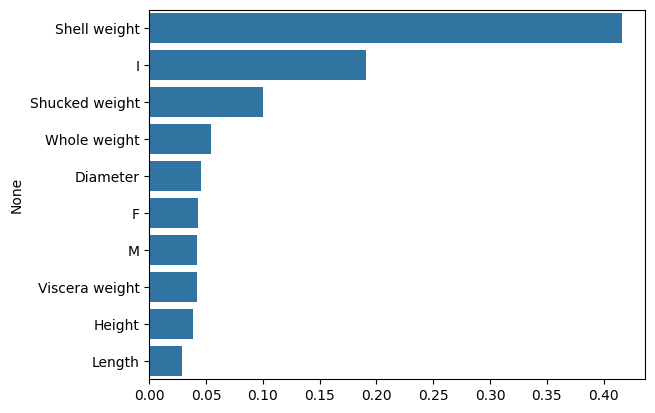

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

xgb_features = pd.Series(xgb_reg.feature_importances_, index=X_train.columns)
xgb_features_sorted = xgb_features.sort_values(ascending=False)
sns.barplot(x=xgb_features_sorted.values, y=xgb_features_sorted.index)
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [149]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [150]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

In [151]:
print(wine_x.shape, wine_y.shape)

(178, 13) (178,)


In [152]:
np.unique(wine_y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

## 2) train/test 셋 분리

In [153]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

print(x_train.shape, y_train.shape)

(124, 13) (124,)


## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [154]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

(참고)

타겟의 클래스가 3개(0, 1, 2)인 경우기 때문에, 각 클래스에 대해 그 클래스를 다른 클래스들과 구분하는 모델이 하나씩 만들어져 각 모델에 대해 계수 벡터 13개씩 나옴.
- 클래스 0 vs 나머지 (1, 2)
- 클래스 1 vs 나머지 (0, 2)
- 클래스 2 vs 나머지 (0, 1)

즉, 회귀 계수 coef_의 shape가 (3, 13), 절편 intercept_의 shape가 (3, 1)임.

In [155]:
#기울기
print(logistic_reg.coef_.shape)
logistic_reg.coef_

(3, 13)


array([[-1.99751386e-01,  3.65451311e-01,  1.49472420e-01,
        -1.88027207e-01, -2.28494295e-02,  1.95456870e-01,
         4.66702169e-01, -1.66796937e-02,  8.23898772e-02,
         6.75013601e-02, -1.92622133e-02,  2.94916328e-01,
         7.42521868e-03],
       [ 5.96476718e-01, -7.88674281e-01, -1.26181715e-01,
         2.12254366e-01, -1.13503885e-02,  3.15786530e-01,
         3.55148678e-01,  3.34676039e-02,  2.79036200e-01,
        -1.17202715e+00,  2.61166174e-01,  4.64732433e-01,
        -8.33633942e-03],
       [-3.96725333e-01,  4.23222970e-01, -2.32907053e-02,
        -2.42271599e-02,  3.41998181e-02, -5.11243400e-01,
        -8.21850846e-01, -1.67879102e-02, -3.61426078e-01,
         1.10452579e+00, -2.41903960e-01, -7.59648761e-01,
         9.11120744e-04]])

In [156]:
#절편
print(logistic_reg.intercept_.shape)
logistic_reg.intercept_

(3,)


array([-0.04177844,  0.09551062, -0.05373218])

3-3) 모델의 정확도를 구하세요.

In [157]:
#모델의 예측값 구하기
logistic_pred = logistic_reg.predict(x_test)

#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(logistic_pred, y_test)
print('로지스틱 모델의 정확도: ', round(logistic_acc, 3))

로지스틱 모델의 정확도:  0.963
